In [1]:
from data_processor import *
from global_variables import *
import matplotlib.pyplot as plt
if not os.path.exists('pics/'):
    os.makedirs('pics/')

### A City's Monthly Average Temperature of a Whole Year

In [2]:
# Parameter
city = 'KSAN'
year = 2018
fname = 'pics/{}/temperature/y{}_plot.jpg'.format(city,year)
if not os.path.exists('pics/{}/temperature/'.format(city)):
    os.makedirs('pics/{}/temperature/'.format(city))
# Code
monthly_avg_temp_list = []
for month in range(1,13):
    month_start, month_end = get_monthly_start_end(year=year, month=month)
    weather_info = get_info(city,month_start, month_end, info_type='temperature', output=False)
    monthly_avg_temp_list.append(weather_info['mean'])
print(monthly_avg_temp_list)
year_start, year_end = get_yearly_start_end(year=year)
weather_info = get_info(city,year_start, year_end, info_type='temperature', output=False)
yearly_avg_temp_list = list([weather_info['mean'] for i in range(12)])
print(yearly_avg_temp_list)

[61.70967741935484, 59.642857142857146, 61.064516129032256, 63.8, 63.87096774193548, 67.76666666666667, 75.2258064516129, 78.35483870967742, 72.13333333333334, 69.45161290322581, 65.83333333333333, 59.483870967741936]
[66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342]


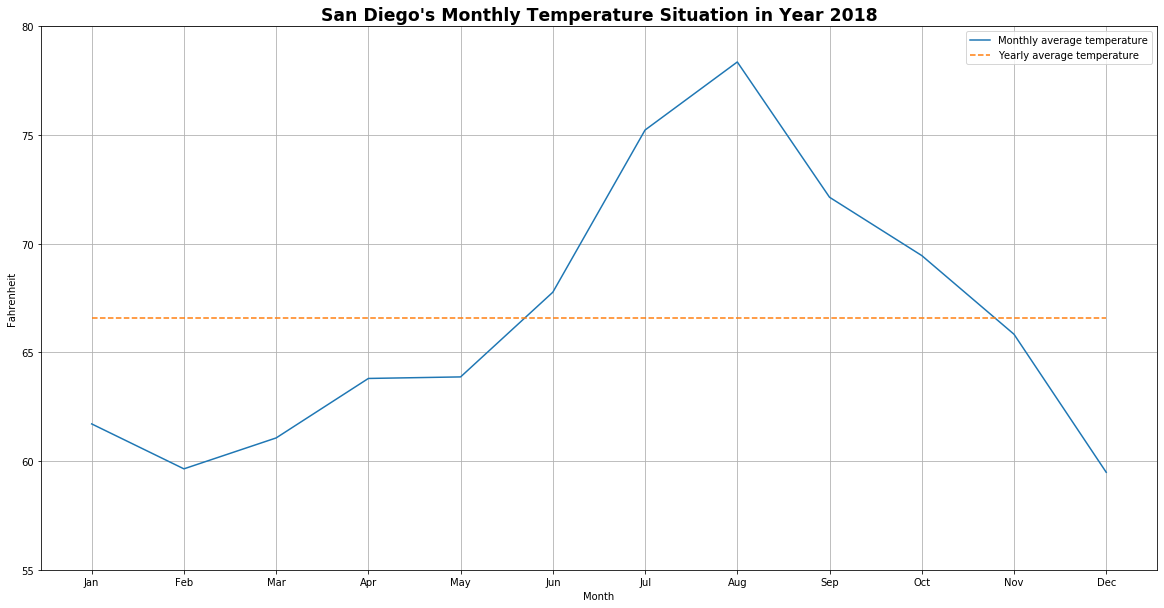

In [3]:
# Plot
plt.figure(figsize=(20,10))
plt.plot(range(12), monthly_avg_temp_list)
plt.plot(range(12), yearly_avg_temp_list, '--')
title_str = '{}\'s Monthly Temperature Situation in Year {}'.format(code_city_refer[city], year)
plt.xlabel('Month')
plt.xticks(range(12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Fahrenheit')
plt.ylim([55,80])
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.legend(['Monthly average temperature','Yearly average temperature'])
plt.grid()
#plt.savefig(fname)
plt.show()

### A City's Average Temperature of a Specific Month in All Years (1990 - 2019)

In [4]:
# Parameter
city = 'KSAN'
month = 3
fname = 'pics/{}/temperature/m{}_plot.jpg'.format(city,month)
if not os.path.exists('pics/{}/temperature/'.format(city)):
    os.makedirs('pics/{}/temperature/'.format(city))
# Code
start_year = 1990
end_year = 2019
if month > 4:
    end_year = 2018
monthly_avg_temp_list = []
yearly_avg_temp_list = []
for year in range(start_year, end_year + 1):
    month_start, month_end = get_monthly_start_end(year=year, month=month)
    weather_info = get_info(city,month_start, month_end, info_type='temperature', output=False)
    monthly_avg_temp_list.append(weather_info['mean'])
    year_start, year_end = get_yearly_start_end(year=year)
    weather_info = get_info(city,year_start, year_end, info_type='temperature', output=False)
    yearly_avg_temp_list.append(weather_info['mean'])
print(monthly_avg_temp_list)

[58.225806451612904, 56.32258064516129, 59.87096774193548, 60.87096774193548, 60.12903225806452, 60.096774193548384, 59.58064516129032, 61.25806451612903, 59.03225806451613, 57.935483870967744, 57.645161290322584, 58.54838709677419, 57.193548387096776, 59.774193548387096, 62.193548387096776, 60.354838709677416, 57.16129032258065, 60.193548387096776, 59.16129032258065, 59.74193548387097, 60.61290322580645, 61.096774193548384, 58.516129032258064, 60.354838709677416, 64.41935483870968, 66.45161290322581, 63.0, 62.935483870967744, 61.064516129032256, 60.87096774193548]


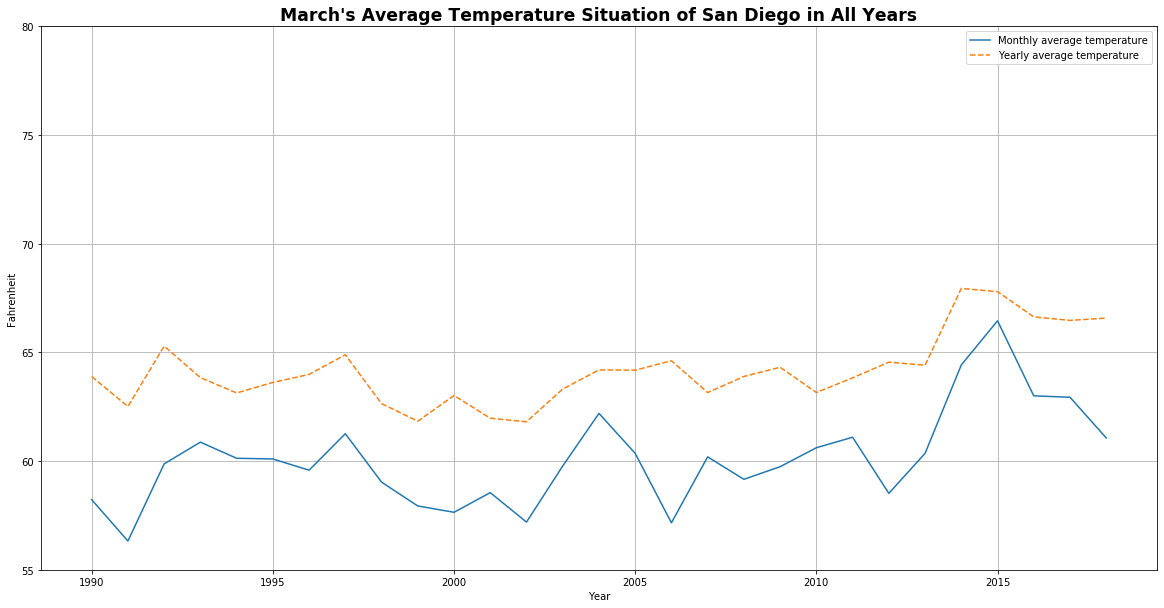

In [5]:
# plot
plt.figure(figsize=(20,10))
plt.plot(range(start_year, end_year), monthly_avg_temp_list[:-1])
plt.plot(range(start_year, end_year), yearly_avg_temp_list[:-1], '--')
title_str = '{}\'s Average Temperature Situation of {} in All Years'.format(get_month_str(month), code_city_refer[city])
plt.xlabel('Year')
plt.ylim([1990,2019])
plt.ylabel('Fahrenheit')
plt.ylim([55,80])
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.legend(['Monthly average temperature','Yearly average temperature'])
plt.grid()
# plt.savefig(fname)
plt.show()

### A City's Yearly Average Temperature in All Years (1990 - 2018)

In [6]:
# Parameter
city = 'KSAN'
fname = 'pics/{}/temperature/all_plot.jpg'.format(city,month)
# Code
start_year = 1990
end_year = 2019
yearly_avg_temp_list = []
for year in range(start_year, end_year + 1):
    year_start, year_end = get_yearly_start_end(year=year)
    weather_info = get_info(city,year_start, year_end, info_type='temperature', output=False)
    yearly_avg_temp_list.append(weather_info['mean'])
print(yearly_avg_temp_list)

[63.88767123287671, 62.50958904109589, 65.28688524590164, 63.83561643835616, 63.134246575342466, 63.61643835616438, 63.986338797814206, 64.89041095890411, 62.64109589041096, 61.83561643835616, 63.01639344262295, 61.96986301369863, 61.80821917808219, 63.31506849315068, 64.19125683060109, 64.18082191780822, 64.61369863013698, 63.15068493150685, 63.89071038251366, 64.31506849315069, 63.153424657534245, 63.827397260273976, 64.54918032786885, 64.40821917808219, 67.93972602739726, 67.79178082191781, 66.6311475409836, 66.47123287671234, 66.57534246575342, 60.25833333333333]


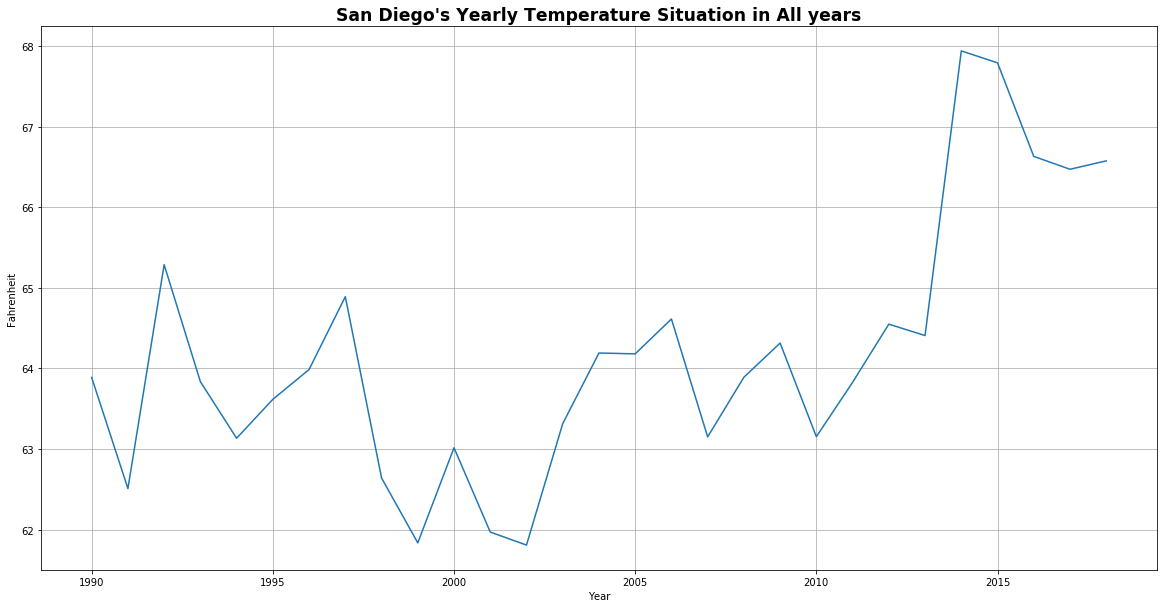

In [7]:
# plot
plt.figure(figsize=(20,10))
plt.plot(range(start_year, end_year), yearly_avg_temp_list[:-1])
title_str = '{}\'s Yearly Temperature Situation in All years'.format(code_city_refer[city])
plt.xlabel('Year')
plt.ylabel('Fahrenheit')
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.grid()
plt.savefig(fname)
plt.show()

### City's Yearly Average Temperature Comparison (1990 - 2018)

In [8]:
# Parameter
fname = 'pics/{}_temp_allyears_plot.jpg'.format(city)
# Code
start_year = 1990
end_year = 2018
cities_yearly_avg_temp_dict = dict([(city,[]) for city in city_code_refer.values()])
for city in city_code_refer.values():
    for year in range(start_year, end_year + 1):
        year_start, year_end = get_yearly_start_end(year=year)
        weather_info = get_info(city,year_start, year_end, info_type='temperature', output=False)
        cities_yearly_avg_temp_dict[city].append(weather_info['mean'])
print(cities_yearly_avg_temp_dict)

{'KSEA': [52.25205479452055, 52.68493150684932, 54.21584699453552, 52.12054794520548, 53.37260273972603, 54.33424657534247, 51.650273224043715, 52.38356164383562, 52.78082191780822, 51.131506849315066, 50.797814207650276, 51.00547945205479, 51.33150684931507, 52.85753424657534, 53.16393442622951, 53.00547945205479, 53.221917808219175, 52.31232876712329, 51.67486338797814, 52.43561643835616, 52.97808219178082, 51.31232876712329, 52.53825136612022, 54.04109589041096, 55.35342465753425, 55.88767123287671, 55.33879781420765, 53.50958904109589, 54.97534246575343], 'KSFO': [57.632876712328766, 57.273972602739725, 59.35792349726776, 58.84109589041096, 56.6958904109589, 57.917808219178085, 58.30601092896175, 59.24109589041096, 56.95890410958904, 56.18356164383562, 57.46448087431694, 57.4, 57.66575342465753, 58.26027397260274, 58.83879781420765, 58.74794520547945, 57.69315068493151, 57.71506849315068, 57.80327868852459, 58.37260273972603, 58.85753424657534, 57.205479452054796, 57.83606557377049

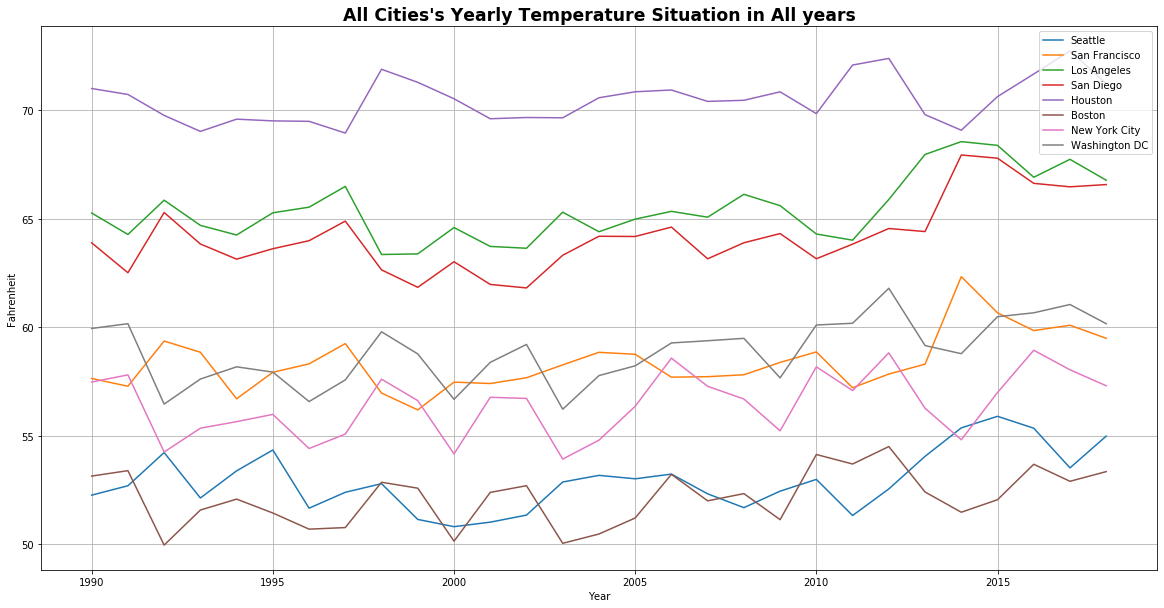

In [9]:
# plot
plt.figure(figsize=(20,10))
for city in city_code_refer.values():
    plt.plot(range(start_year, end_year+1), cities_yearly_avg_temp_dict[city])
title_str = 'All Cities\'s Yearly Temperature Situation in All years'
plt.xlabel('Year')
plt.ylabel('Fahrenheit')
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.legend(list(city_code_refer.keys()))
plt.grid()
plt.show()

### A City's Monthly Average Temperature in All Years (1990 - 2018)

In [10]:
# Parameter
fname = 'pics/{}_temp_allyears_plot.jpg'.format(city)
month = 3
# Code
start_year = 1990
end_year = 2019
if month > 4:
    end_year = 2018
cities_monthly_avg_temp_dict = dict([(city,[]) for city in city_code_refer.values()])
for city in city_code_refer.values():
    for year in range(start_year, end_year + 1):
        month_start, month_end = get_monthly_start_end(year=year, month=month)
        weather_info = get_info(city,month_start, month_end, info_type='temperature', output=False)
        cities_monthly_avg_temp_dict[city].append(weather_info['mean'])
print(cities_monthly_avg_temp_dict)

{'KSEA': [47.03225806451613, 43.935483870967744, 50.516129032258064, 48.096774193548384, 48.25806451612903, 47.903225806451616, 47.29032258064516, 44.58064516129032, 46.354838709677416, 44.064516129032256, 44.29032258064516, 45.16129032258065, 41.516129032258064, 46.516129032258064, 47.516129032258064, 48.83870967741935, 45.38709677419355, 47.41935483870968, 43.74193548387097, 41.935483870967744, 47.193548387096776, 45.25806451612903, 43.38709677419355, 48.12903225806452, 48.70967741935484, 50.774193548387096, 49.61290322580645, 46.12903225806452, 46.54838709677419, 48.67741935483871], 'KSFO': [53.064516129032256, 52.0, 57.193548387096776, 57.32258064516129, 55.54838709677419, 53.67741935483871, 55.67741935483871, 55.774193548387096, 54.74193548387097, 50.70967741935484, 53.96774193548387, 55.064516129032256, 53.54838709677419, 55.483870967741936, 58.903225806451616, 56.903225806451616, 51.03225806451613, 55.935483870967744, 53.83870967741935, 54.03225806451613, 55.38709677419355, 53.9

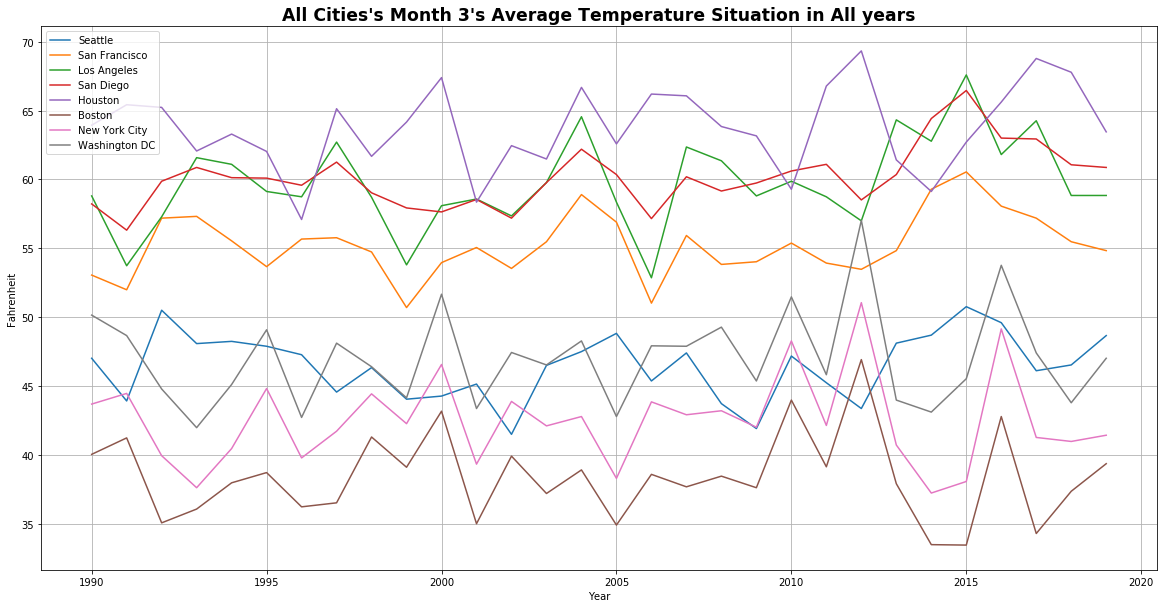

In [11]:
# plot
plt.figure(figsize=(20,10))
for city in city_code_refer.values():
    plt.plot(range(start_year, end_year+1), cities_monthly_avg_temp_dict[city])
title_str = 'All Cities\'s Month {}\'s Average Temperature Situation in All years'.format(month)
plt.xlabel('Year')
plt.ylabel('Fahrenheit')
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.legend(list(city_code_refer.keys()))
plt.grid()
plt.show()